### **This script should be run after LEADS2.pynb. Ensure that all jobs are complete. It will take screen shots of the group GLM previously run. It will also create swarm plots by group; defined in previous script. Note: the first group in each of the stats output files determines what group will be first. Lastly, it will create a latex file (tbd).*

In [1]:
# to do : change labels of group to AMY+ / AMY- / CN ; also put CN first.

from os import system
import os
from paramiko import SSHClient
import subprocess
import nipype.interfaces.freesurfer as fs
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import matplotlib.transforms as transforms
import csv

flatui = ["grey", "peru", "palevioletred"]

project = 'leads' # specifiy project (this is make for leads)
pipelines = ['RECON_FLAIR','RECON_3T']
scripts_path = '/autofs/cluster/animal/scan_data/leads/analyses_nip/scripts/' 
short_rois = csv.reader(open('/autofs/cluster/animal/scan_data/leads/spreadsheets/INTERNAL/ROICONVERSION/ROI_shortconversion.csv'))

In [2]:
def abbreviate_names(reader):
    abbrev = {}
    for row in reader:
        key = row[0]
        if key in row[1]: # put row[1] for now
            pass
        abbrev[key] = row[1:]
    return abbrev
shortname_dict = abbreviate_names(short_rois)

In [3]:
def parserow(rows,cols,rois):
    lastrowL = (rows*cols)
    lastrowF = (rows*cols)-(cols)
    return [rois[i] for i in range(lastrowF, lastrowL)]

In [12]:
## ATTN!!! MAKE SURE THIS MATCHES SCRIPT "TAKE SCREENSHOTS.THAT'S MORE UP TO DATE AND ALSO DOES SSGLMS"
#ALSO NEED TO ADD THE CONVERSION TO JPG FROM TIFF (IN TAKE SCREENSHOTS SCRIPT)

# screenshots

for idx, pip in enumerate(pipelines): 
    analysis_path = '/autofs/cluster/animal/scan_data/leads/analyses_nip/'+pip+'/' 
    # if Screenshots folder does not exist, create it
    try:
        os.mkdir(analysis_path+'Screenshots')
    except(FileExistsError):
        pass

    os.chdir(analysis_path+'Screenshots') 
    print(pip)
    for condition in (['AMYNvsCN','AMYPvsCN']):
        print(condition)
        for i in (['rh','lh']):
            print(i+'-----------------------------------------------------------------------------------------')
            shots = fs.SurfaceSnapshots(subject_id="fsaverage", hemi=i, surface="pial")
            shots.inputs.overlay = analysis_path+"/GROUPANALYSIS/"+i+"."+condition+".thickness.glmdir/group.diff/sig.mgh"
            shots.inputs.overlay_range = (1, 3)
            # save in folder with specific name
            shots.inputs.screenshot_stem = condition+"-"+i
            shots.inputs.truncate_overlay = False #True
            shots.inputs.show_color_scale = True
            shots.inputs.args = 'overlay_color=truncate'
            res = shots.run()

RECON_FLAIR
AMYNvsCN
rh-----------------------------------------------------------------------------------------
190709-12:46:10,750 nipype.interface INFO:
	 stderr 2019-07-09T12:46:10.750562:setting invphaseflag to 1
190709-12:46:14,163 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:thresholds min=2 max=4 slope=0.5 mid=3
190709-12:46:14,164 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:subject is fsaverage
190709-12:46:14,166 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:hemi    is rh
190709-12:46:14,167 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:surface is inflated
190709-12:46:14,168 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:surfer: current subjects dir: /usr/local/freesurfer/stable6_0_0/subjects
190709-12:46:14,168 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:surfer: not in "scripts" dir ==> using cwd for session root
190709-12:46:14,169 nipype.interface INFO:
	 stdout 2019-07-09T12:46:14.163555:su

190709-12:46:23,354 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:subject is fsaverage
190709-12:46:23,355 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:hemi    is rh
190709-12:46:23,356 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:surface is inflated
190709-12:46:23,357 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:surfer: current subjects dir: /usr/local/freesurfer/stable6_0_0/subjects
190709-12:46:23,357 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:surfer: not in "scripts" dir ==> using cwd for session root
190709-12:46:23,358 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:surfer: session root data dir ($session) set to:
190709-12:46:23,359 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:surfer:     /autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/Screenshots
190709-12:46:23,360 nipype.interface INFO:
	 stdout 2019-07-09T12:46:23.353071:checking for nofix files in 'inflated'
1907

190709-12:46:31,424 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:surfer: current subjects dir: /usr/local/freesurfer/stable6_0_0/subjects
190709-12:46:31,424 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:surfer: not in "scripts" dir ==> using cwd for session root
190709-12:46:31,425 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:surfer: session root data dir ($session) set to:
190709-12:46:31,426 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:surfer:     /autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_3T/Screenshots
190709-12:46:31,426 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:checking for nofix files in 'inflated'
190709-12:46:31,427 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:Reading image info (/usr/local/freesurfer/stable6_0_0/subjects/fsaverage)
190709-12:46:31,428 nipype.interface INFO:
	 stdout 2019-07-09T12:46:31.420470:Reading /usr/local/freesurfer/stable6_0_0/subjects/fsaverage/mri/or

190709-12:46:39,591 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:surfer: session root data dir ($session) set to:
190709-12:46:39,592 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:surfer:     /autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_3T/Screenshots
190709-12:46:39,593 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:checking for nofix files in 'inflated'
190709-12:46:39,594 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:Reading image info (/usr/local/freesurfer/stable6_0_0/subjects/fsaverage)
190709-12:46:39,595 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:Reading /usr/local/freesurfer/stable6_0_0/subjects/fsaverage/mri/orig.mgz
190709-12:46:39,596 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:surfer: Reading header info from /usr/local/freesurfer/stable6_0_0/subjects/fsaverage/mri/orig.mgz
190709-12:46:39,597 nipype.interface INFO:
	 stdout 2019-07-09T12:46:39.584995:surfer: vertices=163842, fa

RECON_FLAIR lh
there is no graph eTIV to print for this block 37
RECON_FLAIR rh
there is no graph eTIV to print for this block 37
RECON_FLAIR aseg
RECON_3T lh
there is no graph eTIV to print for this block 37
RECON_3T rh
there is no graph eTIV to print for this block 37
RECON_3T aseg


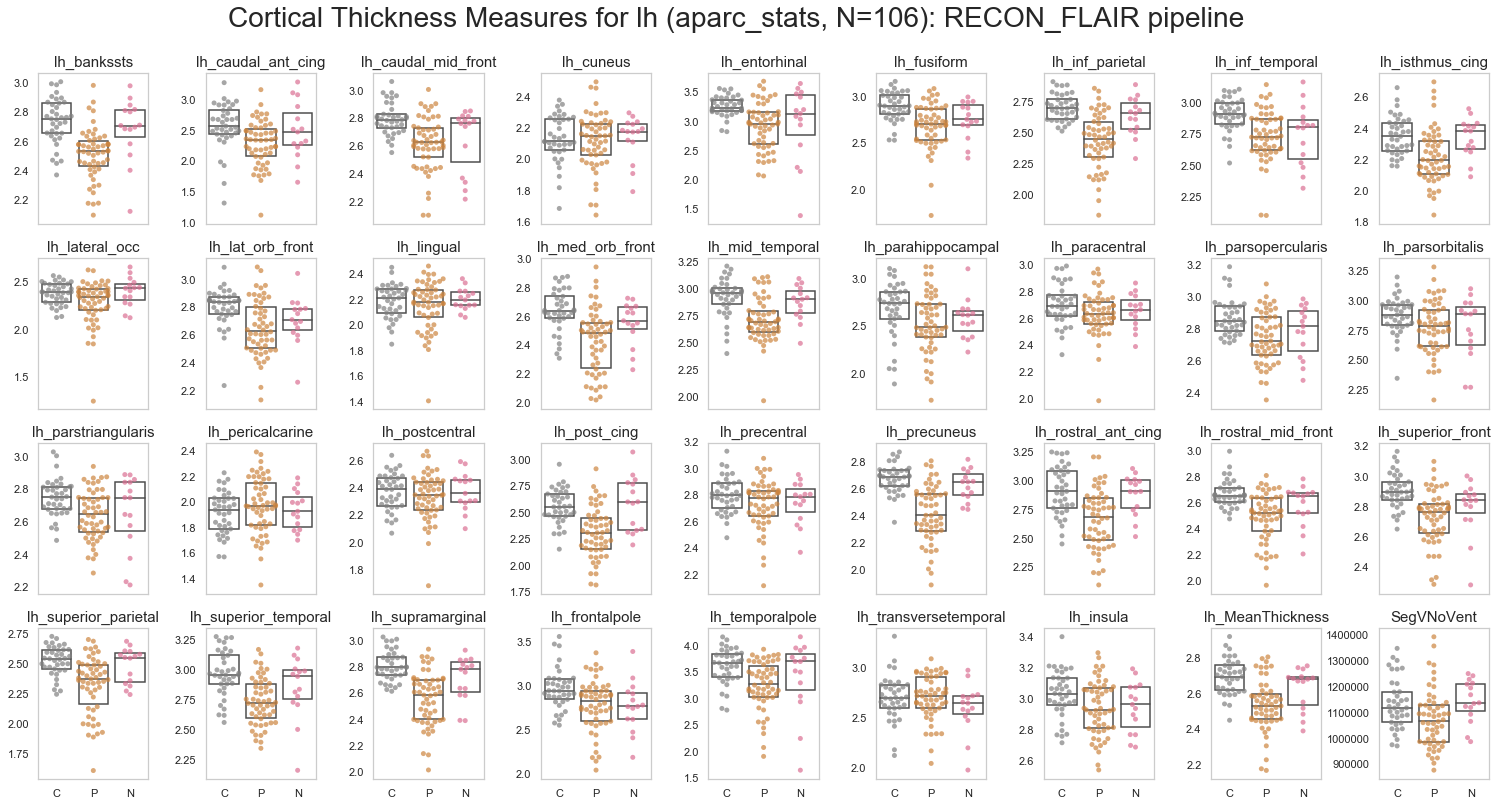

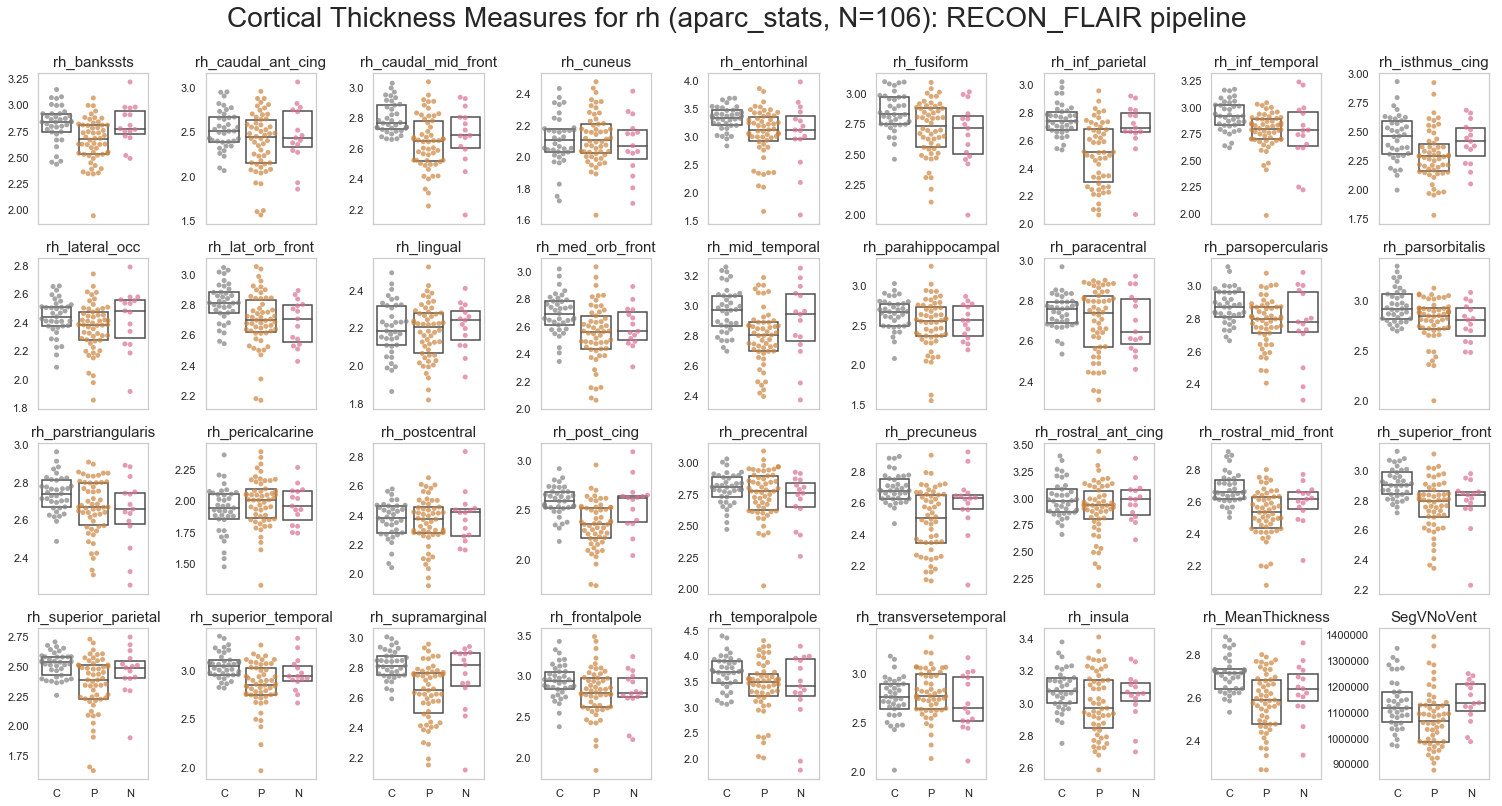

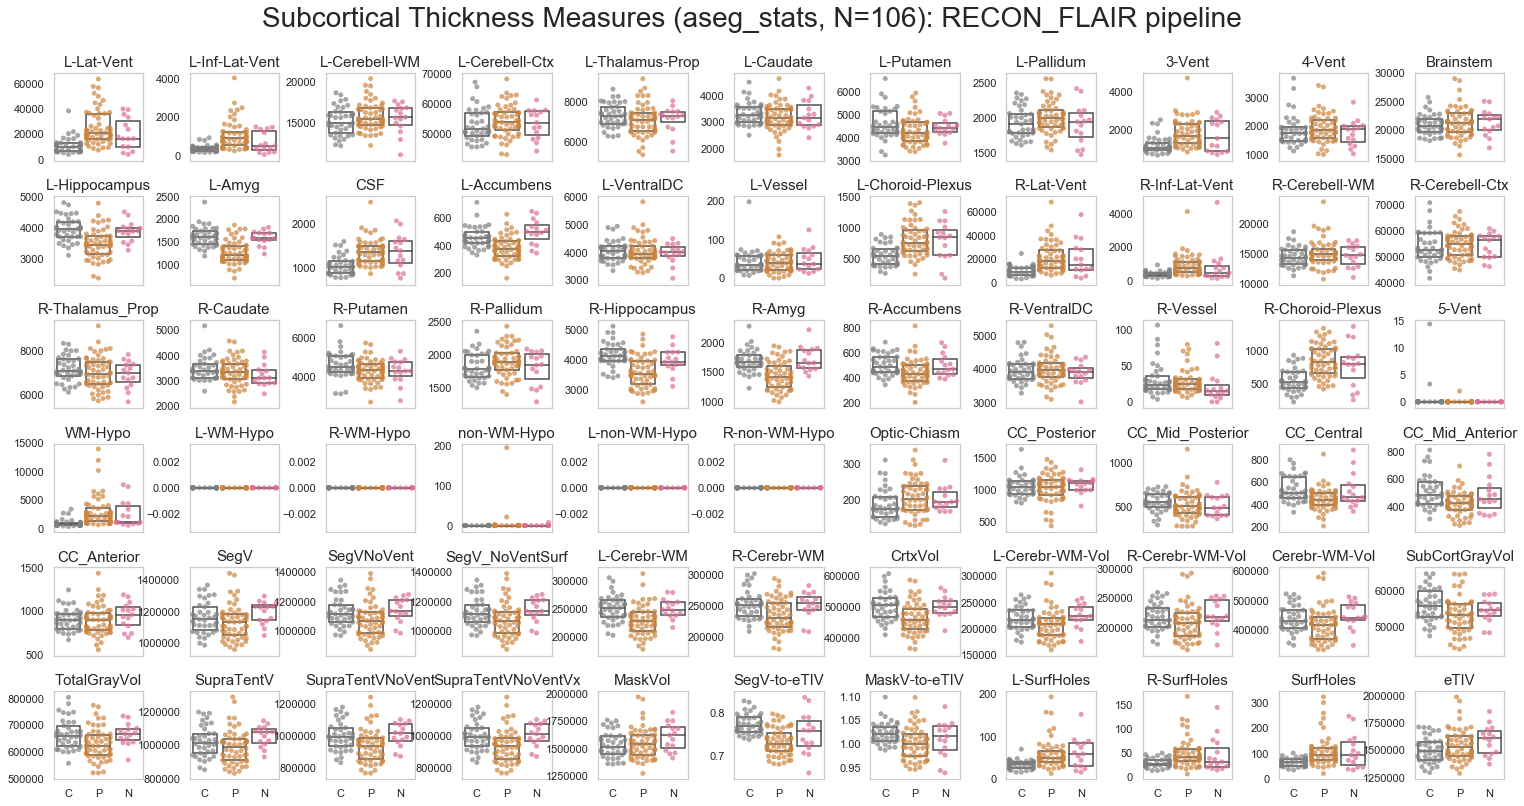

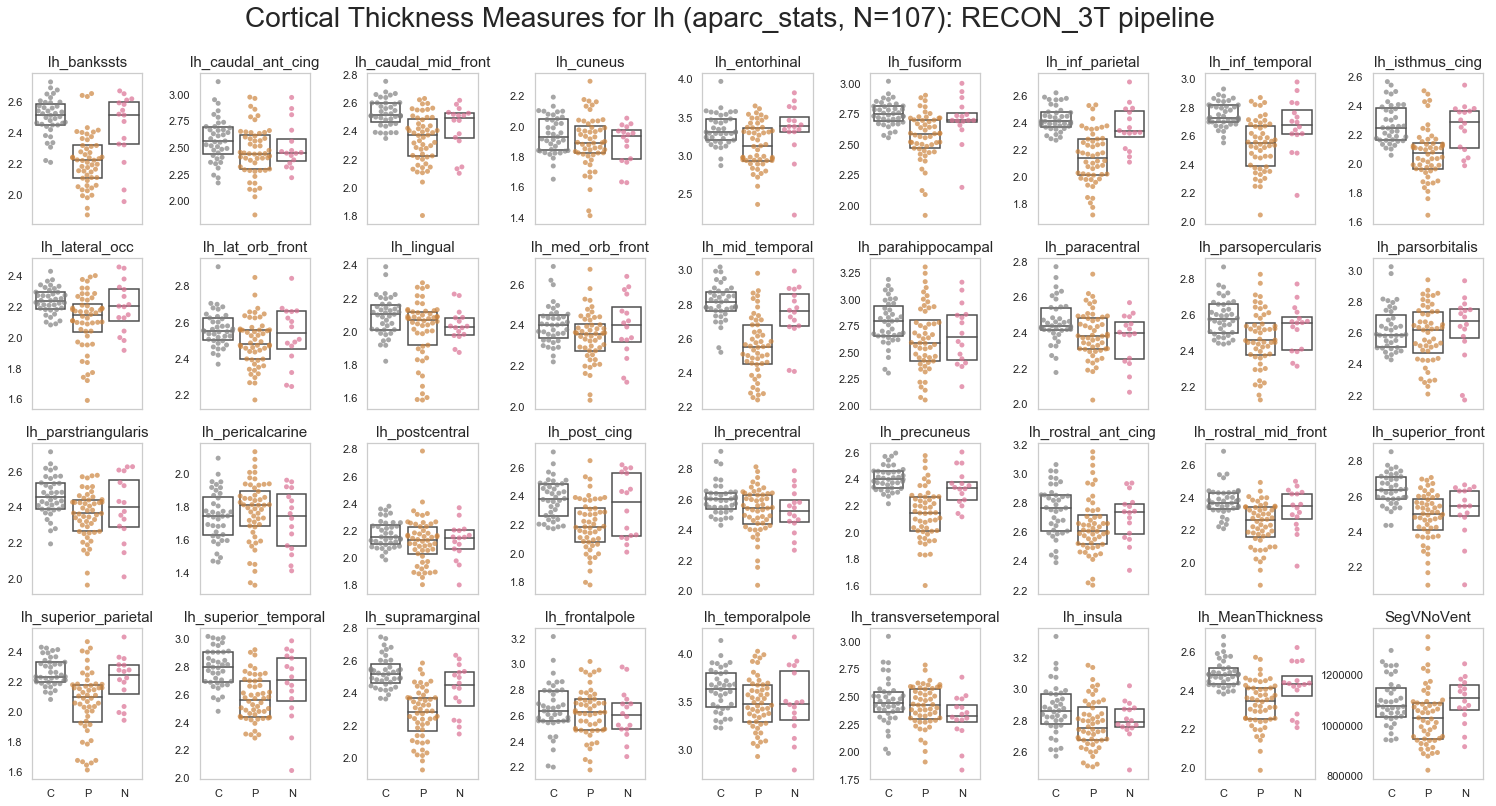

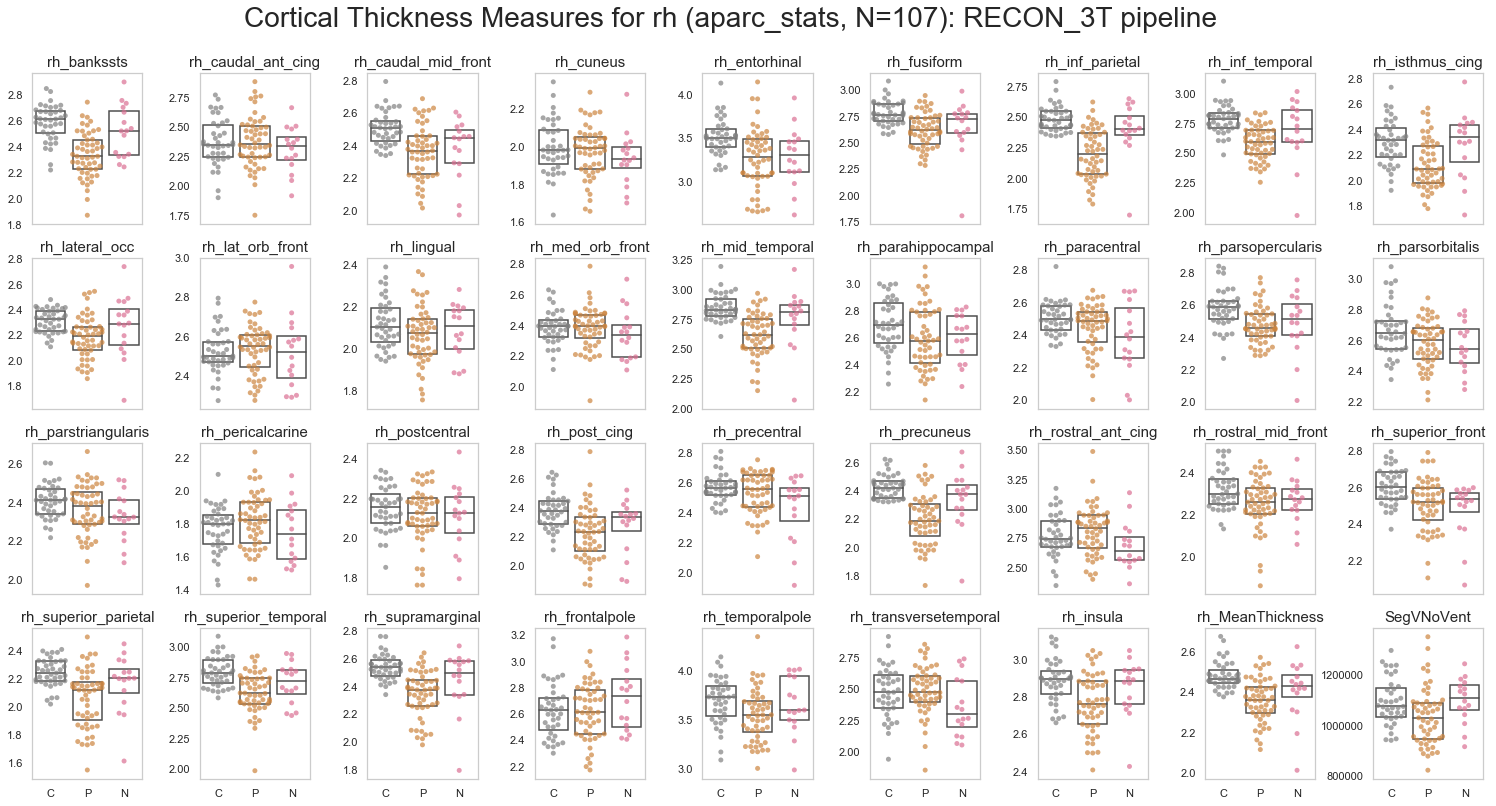

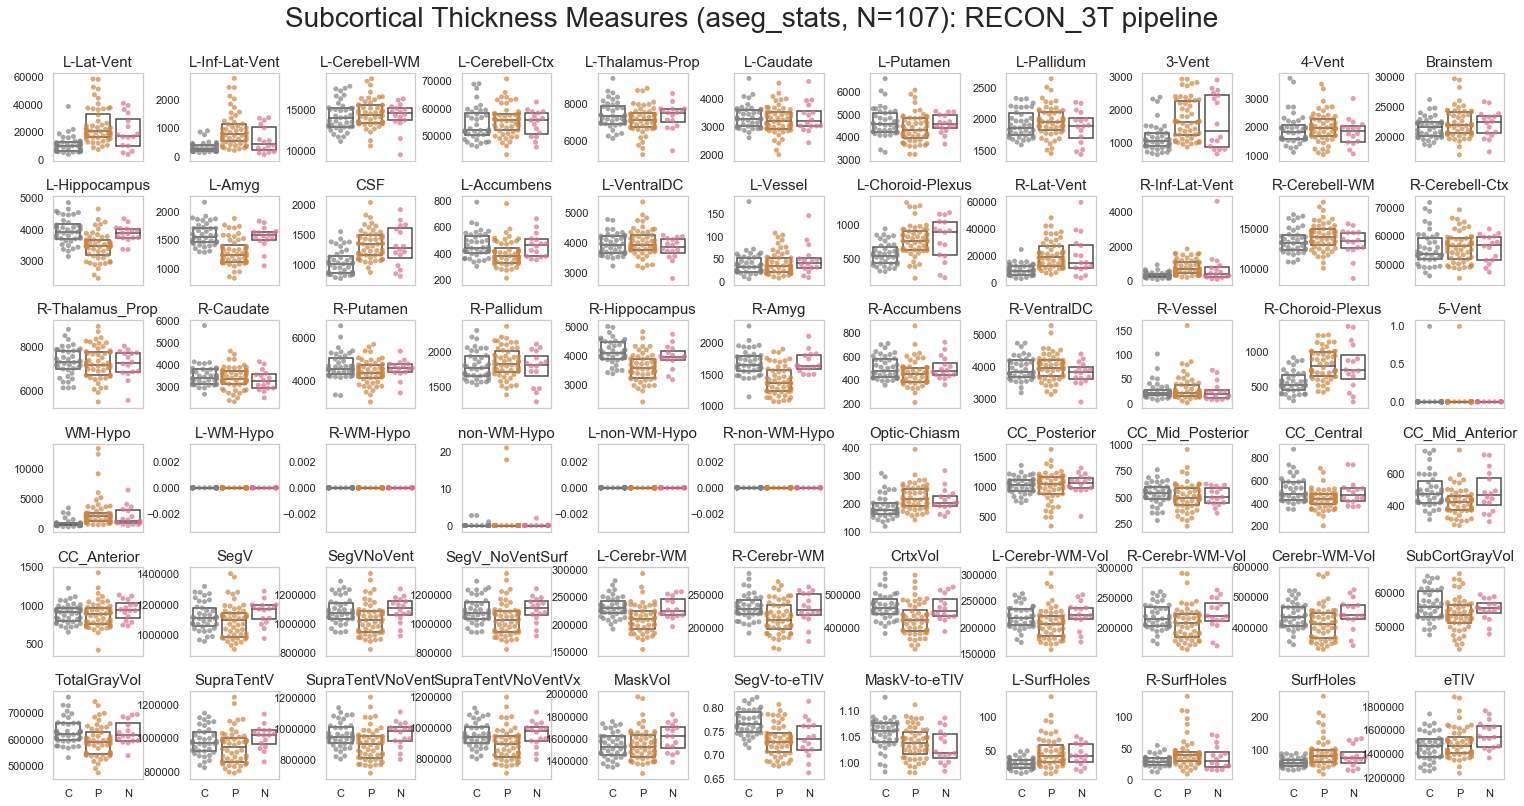

In [8]:
# swarmplots
import seaborn as sns # note : not using facetgrid b/c that is better designed for when wanting rows and columns 
# of the plotgrid to correspond to separate variables. Also b/c ROI labels cannot be moved to the second dimension (so need to give up group or measure label)

# this excludes data with no AMY status, EXCLUDE data, incomplete recon edits.
hemi = ['lh','rh','aseg']

for idx, pip in enumerate(pipelines):
    for tab in hemi:
        print(pip+' '+tab)
        # hemisphere
    
        if tab == 'aseg':
            data = pd.read_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/'+pip+'/GROUPSTATS/leads_'+tab+'_volume_auto.csv') #, index_col=0)
            #rename first column 'measure' b/c pandas doen't like colons
            data = data.rename(columns={ data.columns[0]: "Measure" })
            subj_header = 'Measure'
            rows= 6
            cols= 11
            spacing = .4
            selectiontitle = 'Subcortical Thickness Measures (aseg_stats, N='+str(len(data))+'): '+pip+' pipeline '
        else:
            data = pd.read_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/'+pip+'/GROUPSTATS/leads_'+tab+'_aparc_thickness_auto.csv') #,
            subj_header = tab+'.aparc.thickness'
            rows= 4
            cols= 9
            spacing = .22
            selectiontitle = 'Cortical Thickness Measures for '+tab+' (aparc_stats, N='+str(len(data))+'): '+pip+' pipeline '
        
        group = pd.read_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/'+pip+'/demographics_generated', sep='\t') #, index_col=0)
        data_w_info =  pd.merge(left=group,right=data, left_on='Subject', right_on=subj_header)

        # find len of ROIS
        rois = list(data_w_info)[3:]
        
        # make a list from last row indices
        lastrow = parserow(rows, cols, rois)
        
        fig = plt.figure(figsize=(26, 13))
        fig.subplots_adjust(hspace=spacing, wspace=.52)
        ttl = fig.suptitle(selectiontitle, fontsize=28)
        ttl.set_position([.5, .95])
        counter = 1
        for i in rois:
            shortname = (shortname_dict.get(i))[0]
            try: 
                sns.set(style="whitegrid")
                ax = plt.subplot(rows, cols, counter)
                ax = sns.boxplot(x= 'Group', y=i, data=data_w_info, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
                ax2 = sns.swarmplot(x= 'Group', y=i, hue='Group', data=data_w_info, palette=flatui, alpha=0.7, s=5)
                ax2.set_ylabel('')
                ax2.set_xlabel('')
                ax2.axes.set_title(shortname, fontsize=15)
                ax2.legend_.remove()
                ax2.grid(False)
                if i not in lastrow:
                    ax2.set_xticklabels([])
                counter = counter + 1
            except ValueError:
                print('there is no graph '+i+' to print for this block '+str(counter))
        plt.savefig('/autofs/cluster/animal/scan_data/leads/analyses_nip/'+pip+'/figures/'+tab+'boxswarmplot.png')

    # ADD LATER: also be able to edit stats file to remove failed ones (for flair) plot by specific variable (single plot)